In [130]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse, Polygon, Wedge, Circle, Arc
import numpy as np
%matplotlib inline
plt.rc('text',usetex=True)
plt.rc('font', weight='bold')
plt.rc('font', family='serif')
import psrchive as pc
from glob import glob
import os
import sys
plt.rc('font', size=52)
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize

plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.rc('ytick', direction='in')
plt.rc('xtick', direction='in')
plt.rc('xtick.major',size=10)
plt.rc('ytick.major',size=10)
plt.rc('xtick.minor',size=5)
plt.rc('ytick.minor',size=5)

In [66]:
archive_file='B1937+21_J230811_042155.wrk'

In [67]:
archive = pc.Archive_load(archive_file)
# archive.pscrunch()
# archive.remove_baseline()

# archive.dedisperse()


In [68]:
data = archive.get_data()
data.shape # (Nsubint, Npol, Nchan, Nbin)

(180, 1, 1536, 128)

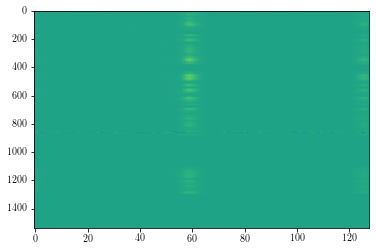

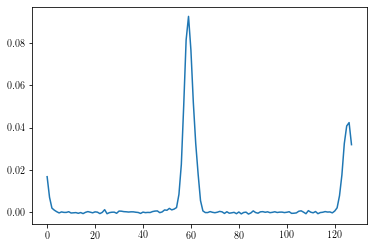

In [72]:
    
archive = pc.Archive_load(archive_file)
archive.pscrunch()
archive.tscrunch()
# archive.fscrunch()

archive.dedisperse()    

archive.remove_baseline()

data3_initial = archive.get_data()
data3_initial = data3_initial[:,0,:,:] # (Nsubint,Nchan,Nbin)
data_freqphase = data3_initial.mean(0) # (Nchan,Nbin)
data_profile = data_freqphase.mean(0) # (Nbin)

plt.imshow(data_freqphase, aspect='auto')
plt.show()
plt.plot(data_profile)

In [145]:
def get_PulseProfile(archive_file, dedisperse=True, phaseoff=np.nan):
    
    archive = pc.Archive_load(archive_file)
    archive.pscrunch()
    archive.tscrunch()
    archive.fscrunch()
    
    if dedisperse:
        archive.dedisperse()    
    
    archive.remove_baseline()
    
    if not np.isnan(phaseoff):
        archive.centre_max_bin(phase_offset=phaseoff)
        
    data3_initial = archive.get_data()
    data3_initial = data3_initial[:,0,:,:] # (Nsubint,Nchan,Nbin)
    data_freqphase = data3_initial.mean(0) # (Nchan,Nbin)
    data_profile = data_freqphase.mean(0) # (Nbin)
    
    return data_profile

In [146]:
def get_FreqPhase(archive_file, dedisperse=True, phaseoff=np.nan):
    
    archive = pc.Archive_load(archive_file)
    archive.pscrunch()
    archive.remove_baseline()
    archive.tscrunch()

    if dedisperse:
        archive.dedisperse()    

    if not np.isnan(phaseoff):
        archive.centre_max_bin(phase_offset=phaseoff)

    Nchan = archive.get_nchan()
    bandwidth = (archive.get_bandwidth())
    centreFreq = archive.get_centre_frequency()
    freqMin = centreFreq-bandwidth/2.0
    freqMax = centreFreq+bandwidth/2.0
    chanToMHz = bandwidth/float(Nchan)
#     archive_copy.centre_max_bin(phase_offset=phaseoff)
    data3_initial = archive.get_data()
    data3_initial = data3_initial[:,0,:,:] # (Nsubint,Nchan,Nbin)
    data_freqphase = data3_initial.mean(0) # (Nchan,Nbin)
    
    return data_freqphase, freqMin, freqMax

In [103]:
def get_psrname(file):
    
    return file.split('_')[0]

In [101]:
archive_files = ['B1937+21_J230811_042155.wrk', 'B0329+54_J230613_131449.wrk', 'J0613-0200_J230324_172819.wrk', \
                 'B1237+25_J230812_150918.wrk', 'J2145-0750_J230114_132232.wrk', 'B0144+59_J221207_022147.wrk', \
                 'B0540+23_J170309_220116.wrk']

In [104]:
profiles = {}

B1937+21_J230811_042155.wrk B1937+21


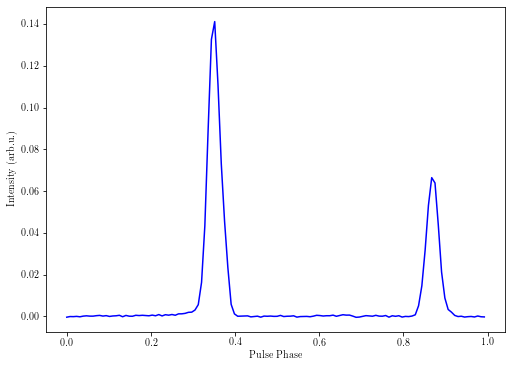

B0329+54_J230613_131449.wrk B0329+54


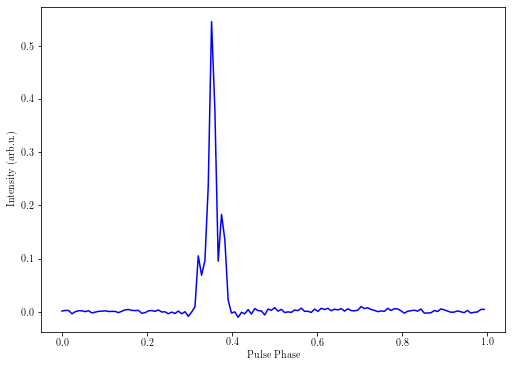

J0613-0200_J230324_172819.wrk J0613-0200


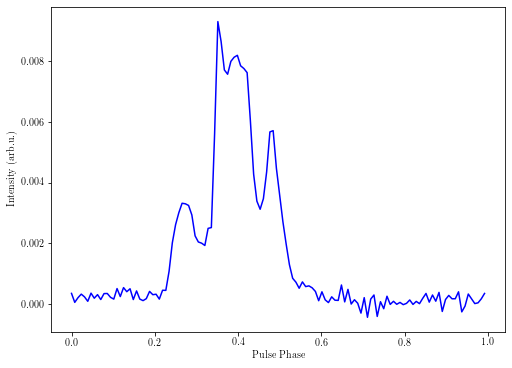

B1237+25_J230812_150918.wrk B1237+25


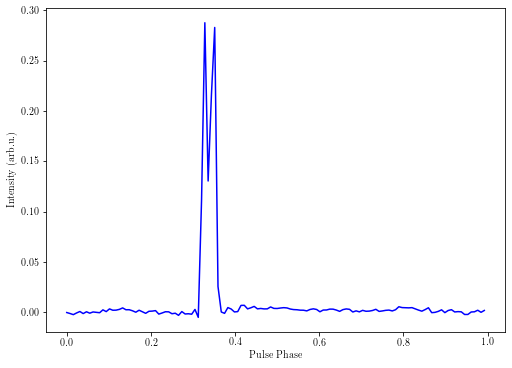

J2145-0750_J230114_132232.wrk J2145-0750


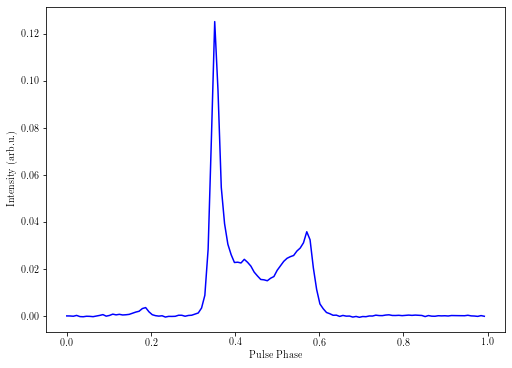

B0144+59_J221207_022147.wrk B0144+59


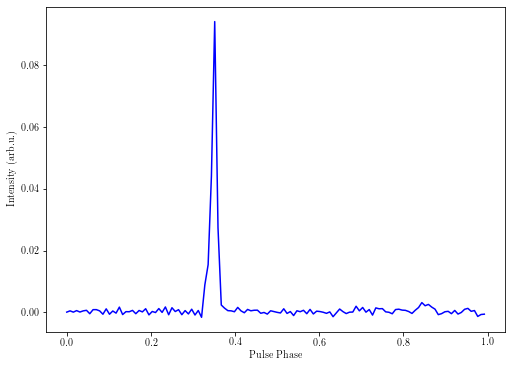

B0540+23_J170309_220116.wrk B0540+23


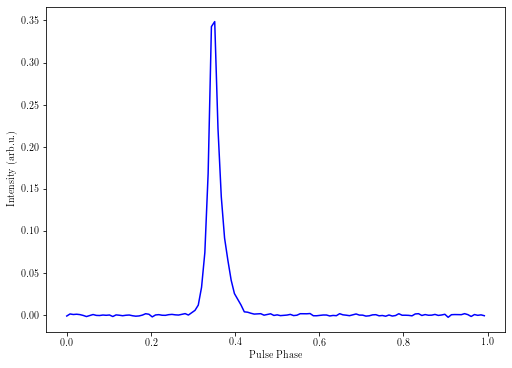

In [105]:
for i, file in enumerate(archive_files):
    
        
        psr = get_psrname(file)
        print(file, psr)

        data_profile = get_PulseProfile(file, phaseoff=0.35)
        profiles[file] = data_profile

        Nbin = data_profile.shape[0]
        xbins = np.arange(Nbin)

        xphase = xbins/float(Nbin)

        fig = plt.figure(figsize = [7, 5], constrained_layout=True)
        ax = fig.add_subplot(111)

        ax.plot(xphase,data_profile,'-b')

        ax.set_xlabel('Pulse Phase')
        ax.set_ylabel('Intensity (arb.u.)')

        plt.show()
        plt.close()

In [108]:
archive_files_forPP = ['B0329+54_J230613_131449.wrk', 'B0540+23_J170309_220116.wrk', \
                       'J0613-0200_J230324_172819.wrk', 'B1237+25_J230812_150918.wrk', \
                       'B1937+21_J230811_042155.wrk', 'J2145-0750_J230114_132232.wrk']

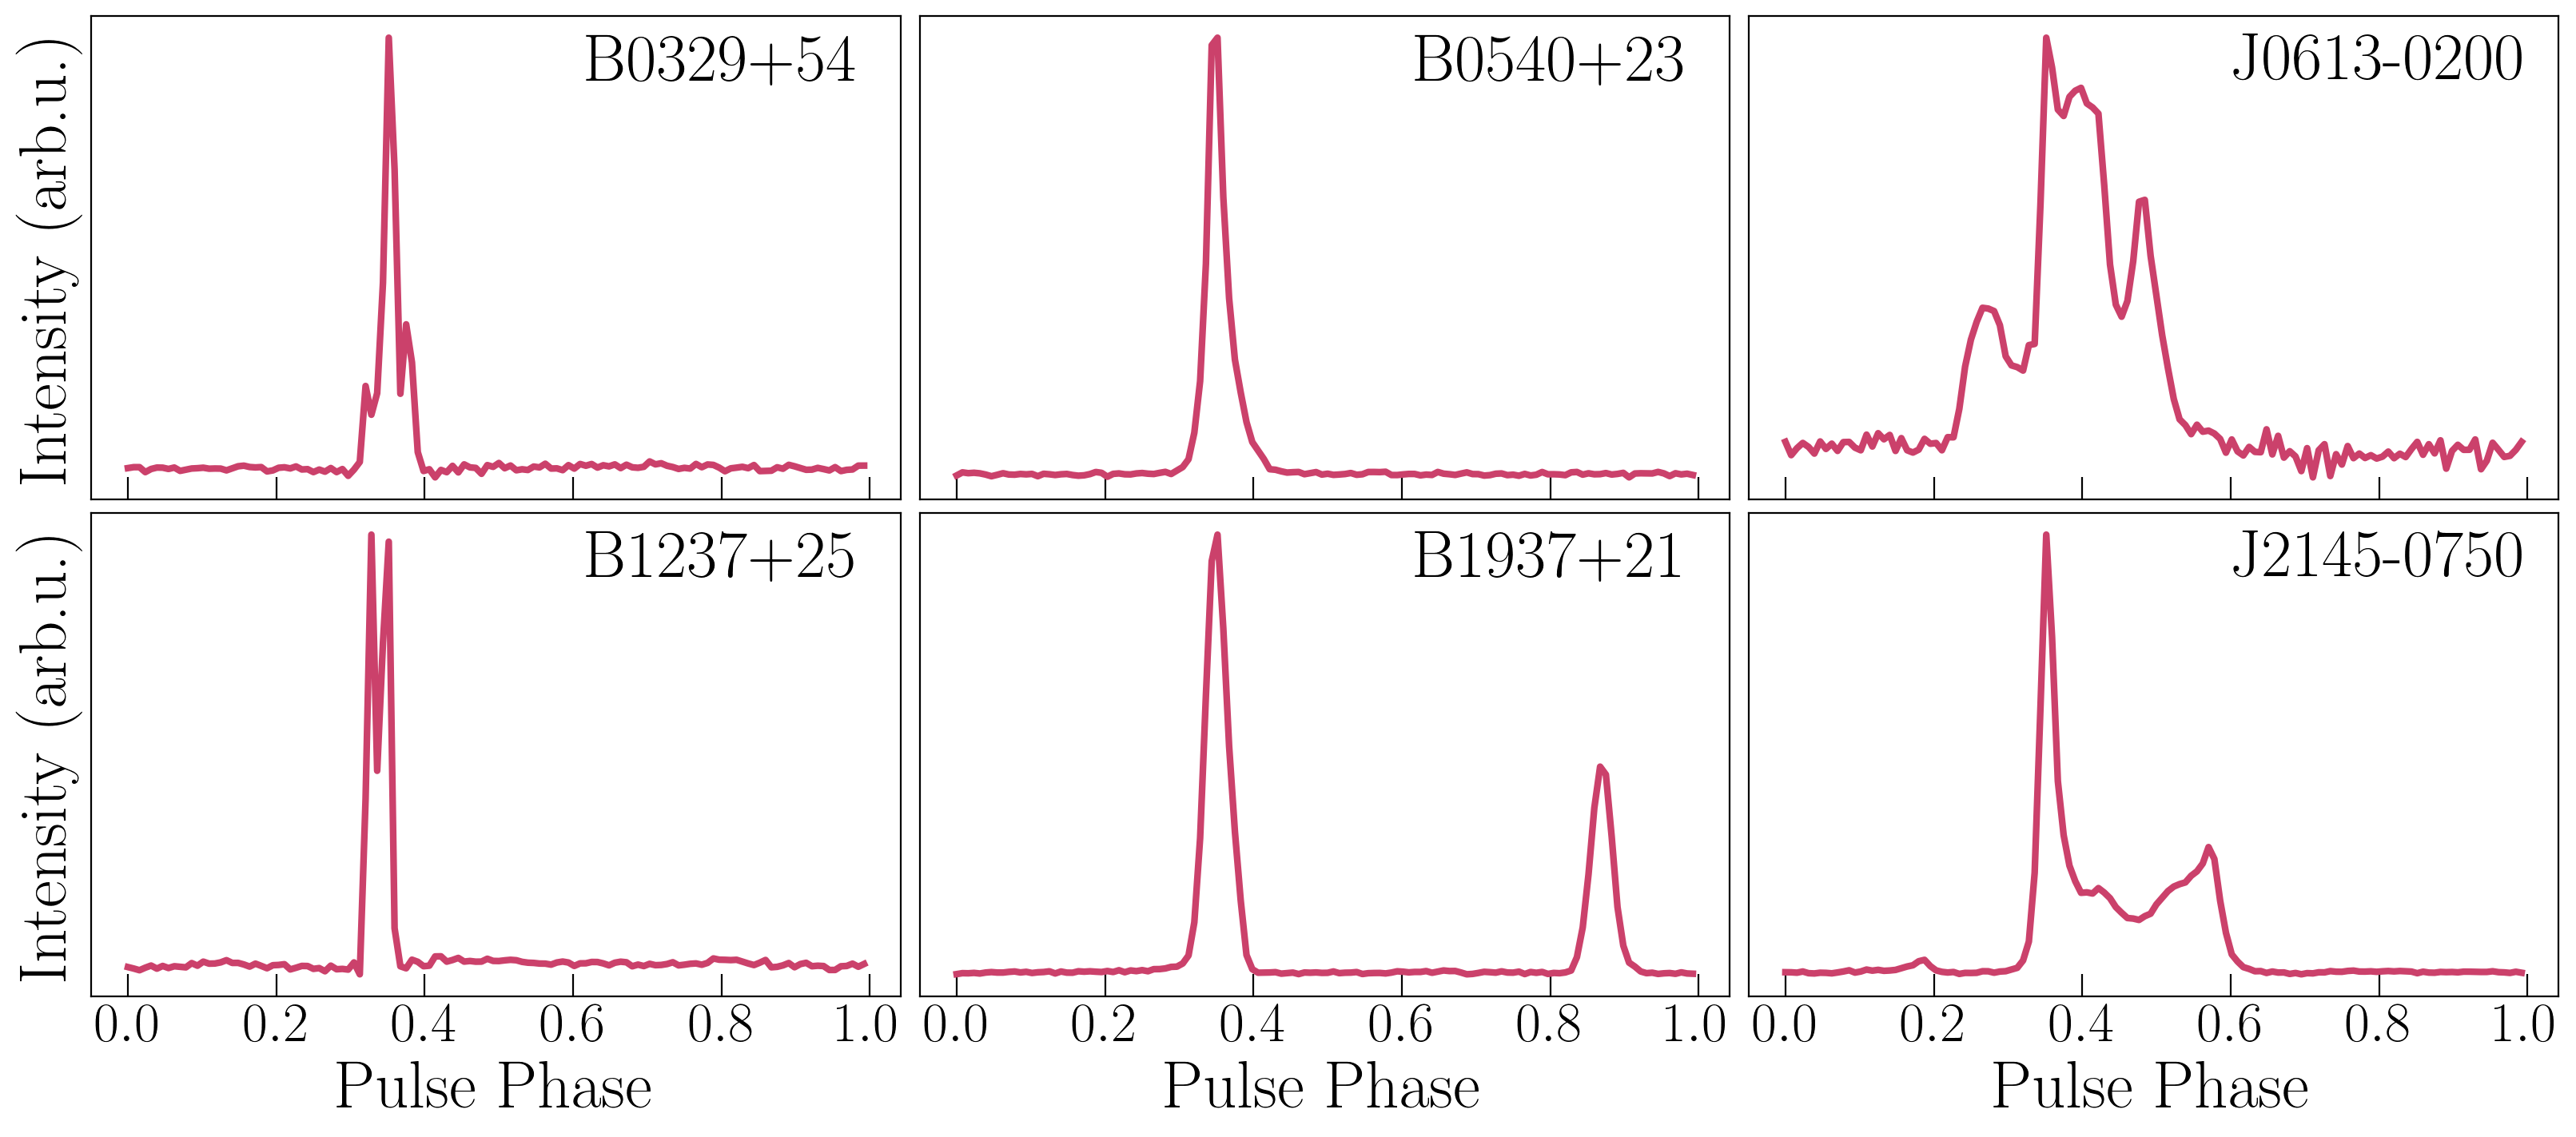

In [139]:
fig, axs = plt.subplots(2, 3, figsize=(16, 7), constrained_layout=True, sharex=True)

for ax, file in zip(axs.flat, archive_files_forPP):
    
    psr = get_psrname(file)
#     print(file, psr)

    data_profile = profiles[file]
    
    Nbin = data_profile.shape[0]
    xbins = np.arange(Nbin)

    xphase = xbins/float(Nbin)

    ax.plot(xphase, data_profile, color='xkcd:dark pink', linewidth=3)

    ax.text(0.78, 0.9, psr, horizontalalignment='center', verticalalignment='center', \
            transform=ax.transAxes, fontsize=30)
    ax.set_yticks([])
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    
for ax in axs[1,:]:
    ax.set_xlabel('Pulse Phase')

for ax in axs[:,0]:
    ax.set_ylabel('Intensity (arb.u.)')

fig.set_dpi(200) #500
fig.savefig('Fig_PulseProfiles.pdf', bbox_inches='tight')
    
plt.show()

B0144+59_J221207_022147.wrk


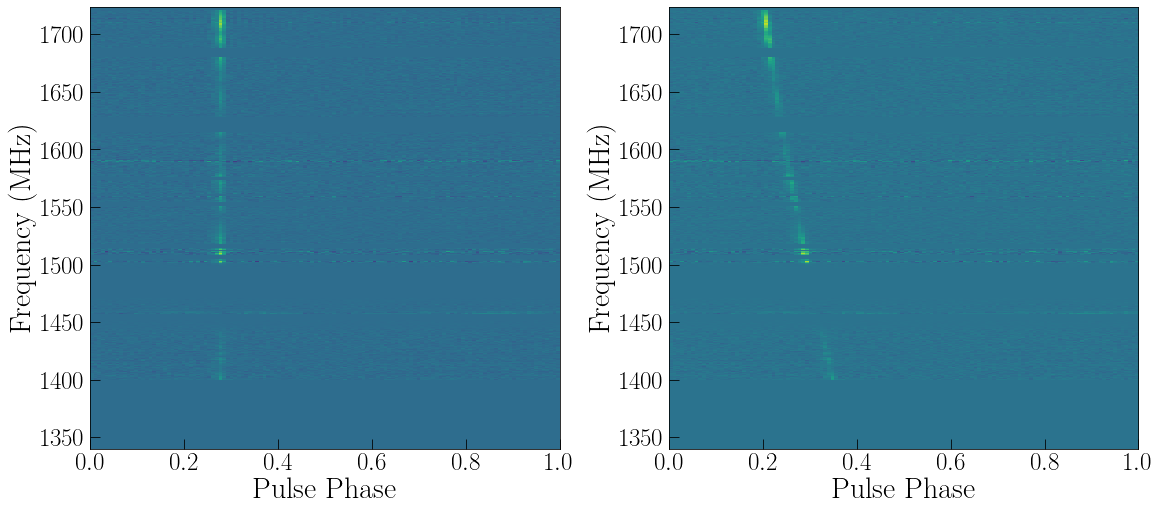

B0540+23_J170309_220116.wrk


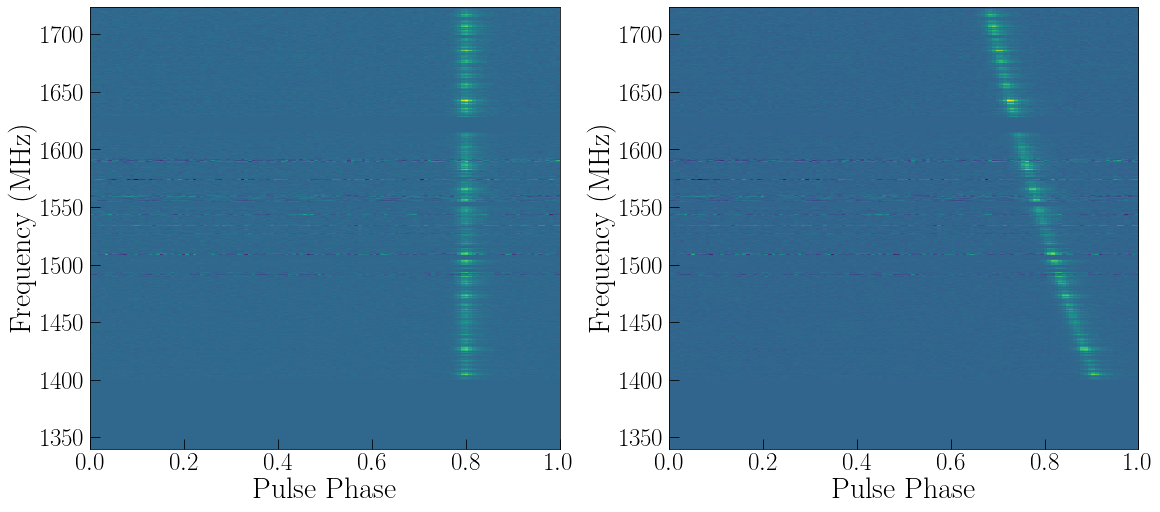

In [141]:
for i, file in enumerate(archive_files[-2:]):

        print(file)
        fig = plt.figure(figsize = [16, 7], constrained_layout=True)
        ax = fig.add_subplot(121)

        data_freqphase, freqMin, freqMax = get_FreqPhase(file, dedisperse=True)

        ax.imshow(data_freqphase,aspect = 'auto',interpolation = 'nearest',extent = [0,1,freqMax,freqMin])

        ax.set_xlabel('Pulse Phase')
        ax.set_ylabel('Frequency (MHz)')

        data_freqphase, freqMin, freqMax = get_FreqPhase(file, dedisperse=False)

        ax = fig.add_subplot(122)
        
        ax.imshow(data_freqphase,aspect = 'auto',interpolation = 'nearest',extent = [0,1,freqMax,freqMin])

        ax.set_xlabel('Pulse Phase')
        ax.set_ylabel('Frequency (MHz)')

        plt.show()
        plt.close()

In [192]:
fileD = archive_files[-1]
phoff = np.nan

psr = get_psrname(fileD)
print(fileD, psr)

data_freqphase_d, freqMin, freqMax = get_FreqPhase(fileD, dedisperse=True, phaseoff=phoff)

data_freqphase_nod, freqMin, freqMax = get_FreqPhase(fileD, dedisperse=False, phaseoff=phoff)

data_profile_d = get_PulseProfile(fileD, phaseoff=phoff, dedisperse=True)

data_profile_nod = get_PulseProfile(fileD, phaseoff=phoff, dedisperse=False)

Nbin = data_profile_d.shape[0]
xbins = np.arange(Nbin)
xphase = xbins/float(Nbin)

Nchan = data_freqphase_d.shape[0]
yfreqs = freqMax + np.arange(Nchan) * (freqMin - freqMax)/ (Nchan - 1)


B0540+23_J170309_220116.wrk B0540+23


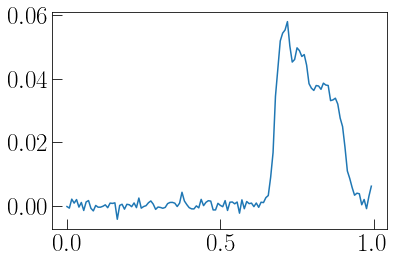

In [163]:
plt.plot(xphase, data_freqphase_nod.mean(0))

In [183]:
data_freq_d.shape, data_freqphase.shape, freqMax, freqMin

((128,), (768, 128), 1340.0, 1724.0)

In [199]:
data_freqphase_nod[yfreqs>=1400, :][:, xphase>=0.5].shape

(648, 64)

In [206]:
yfreqs[::-1]

array([1724.        , 1723.49934811, 1722.99869622, 1722.49804433,
       1721.99739244, 1721.49674055, 1720.99608866, 1720.49543677,
       1719.99478488, 1719.49413299, 1718.9934811 , 1718.4928292 ,
       1717.99217731, 1717.49152542, 1716.99087353, 1716.49022164,
       1715.98956975, 1715.48891786, 1714.98826597, 1714.48761408,
       1713.98696219, 1713.4863103 , 1712.98565841, 1712.48500652,
       1711.98435463, 1711.48370274, 1710.98305085, 1710.48239896,
       1709.98174707, 1709.48109518, 1708.98044329, 1708.4797914 ,
       1707.9791395 , 1707.47848761, 1706.97783572, 1706.47718383,
       1705.97653194, 1705.47588005, 1704.97522816, 1704.47457627,
       1703.97392438, 1703.47327249, 1702.9726206 , 1702.47196871,
       1701.97131682, 1701.47066493, 1700.97001304, 1700.46936115,
       1699.96870926, 1699.46805737, 1698.96740548, 1698.46675359,
       1697.96610169, 1697.4654498 , 1696.96479791, 1696.46414602,
       1695.96349413, 1695.46284224, 1694.96219035, 1694.46153

/home/mbcx4in2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


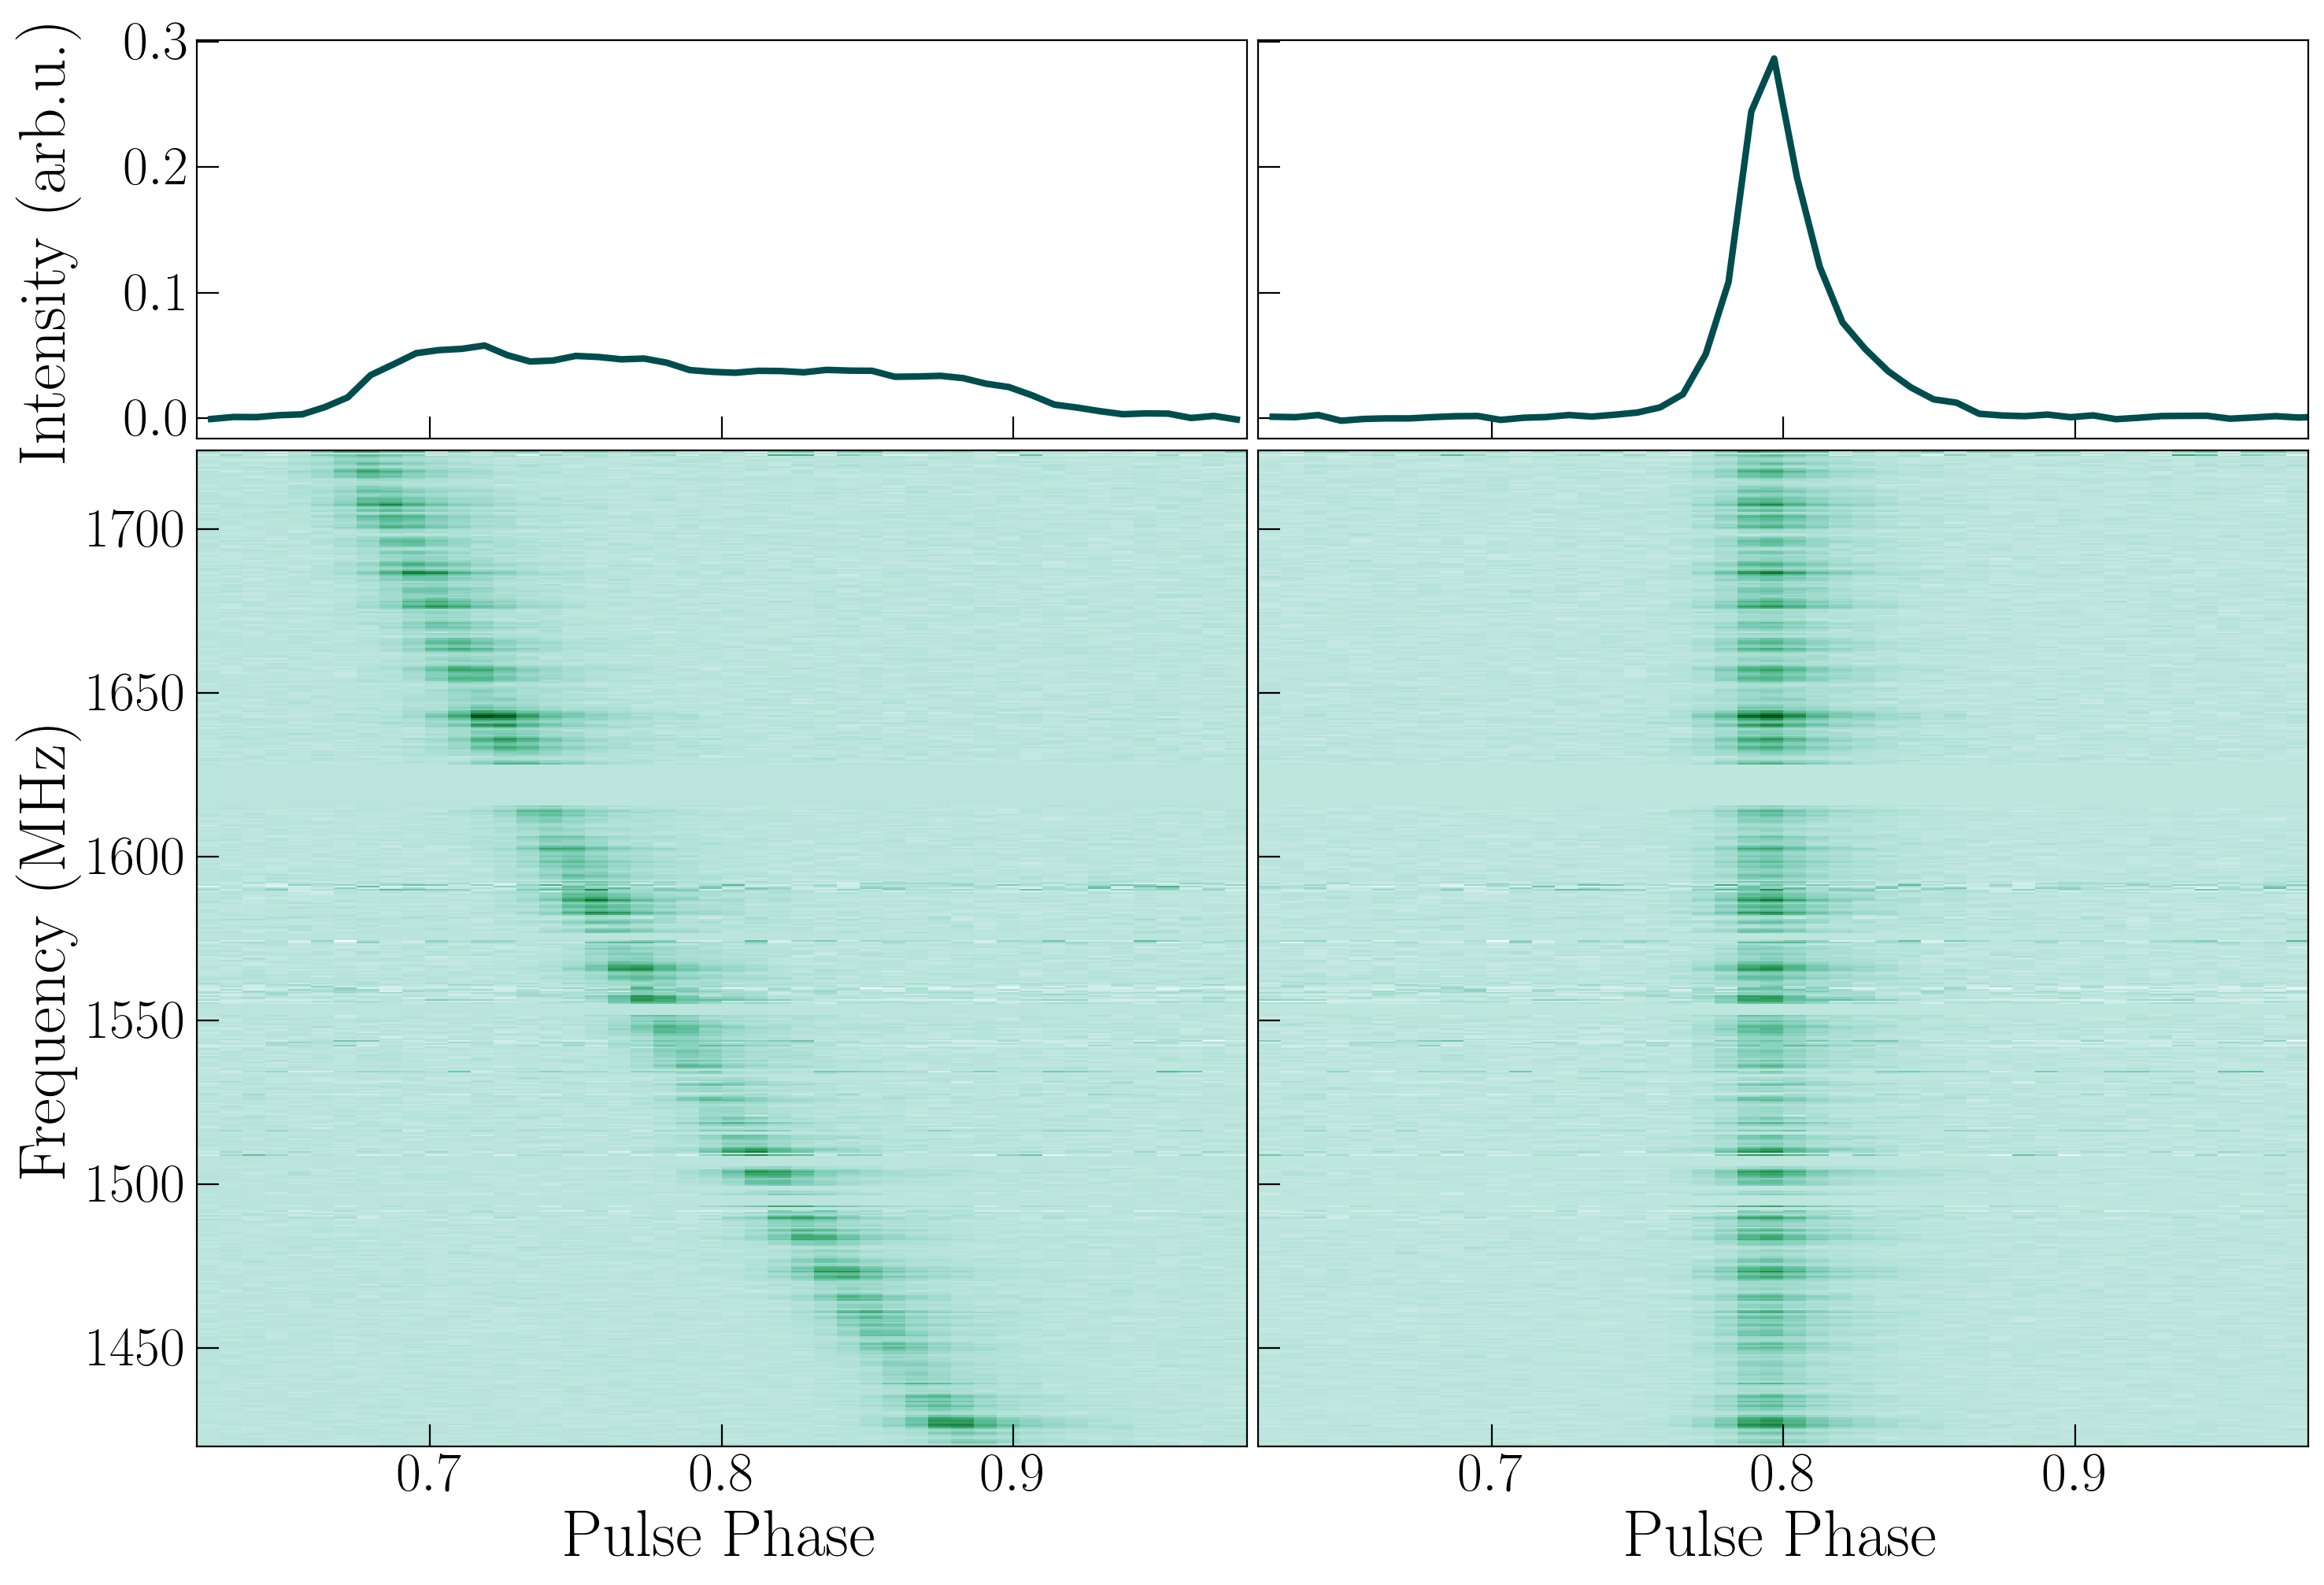

In [244]:
fig = plt.figure(figsize=(16,9), constrained_layout=True)
subfigs = fig.subfigures(2, 1, wspace=0.07, height_ratios=[1, 2.5])
axsprof = subfigs[0].subplots(1,2, sharex=True, sharey=True)
axsd = subfigs[1].subplots(1,2, sharex=True, sharey=True)

data_freq_nod = data_freqphase_nod.mean(0)
data_freq_d = data_freqphase_d.mean(0)

phasemin = 0.62
phasemax = 0.98
freqmin = 1420

axsprof[0].plot(xphase[(xphase>=phasemin) & (xphase<=phasemax)],\
                data_freq_nod[(xphase>=phasemin) & (xphase<=phasemax)], \
                linewidth=3, c='xkcd:dark teal')
axsprof[1].plot(xphase[xphase>=phasemin], data_freq_d[xphase>=phasemin], \
                linewidth=3, c='xkcd:dark teal')
# axsprof[1].plot(xphase, data_profile_d)

for ax in axsprof:
    ax.set_xlim([phasemin, phasemax])
    ax.set_xticklabels([])

axsd[0].imshow(data_freqphase_nod[yfreqs[::-1]>=freqmin,:][:,(xphase>=phasemin) & (xphase<=phasemax)], \
               aspect = 'auto', interpolation = 'nearest', cmap='BuGn',\
               extent = [phasemin,phasemax,freqmin, freqMin])
axsd[1].imshow(data_freqphase_d[yfreqs[::-1]>=freqmin,:][:,(xphase>=phasemin) & (xphase<=phasemax)], aspect = 'auto', interpolation = 'nearest', \
               extent = [phasemin,phasemax,freqmin, freqMin], cmap='BuGn')
plt.subplots_adjust(left=0.05, bottom=0.1, right=0.99, top=0.99, wspace=0.05, hspace=0.0)


 
axsprof[0].set_ylabel('Intensity (arb.u.)')
axsd[0].set_ylabel('Frequency (MHz)')
axsd[0].set_xlabel('Pulse Phase')
axsd[1].set_xlabel('Pulse Phase')
axsd[0].yaxis.set_label_coords(-0.11, 0.5)
axsprof[0].yaxis.set_label_coords(-0.11, 0.5)

axsprof[0].set_yticks(np.arange(0, 0.31, step=0.1))

fig.tight_layout(pad=0.1)

fig.set_dpi(200) #500
fig.savefig('Fig_Dispersion.pdf', bbox_inches='tight')
   
plt.show()

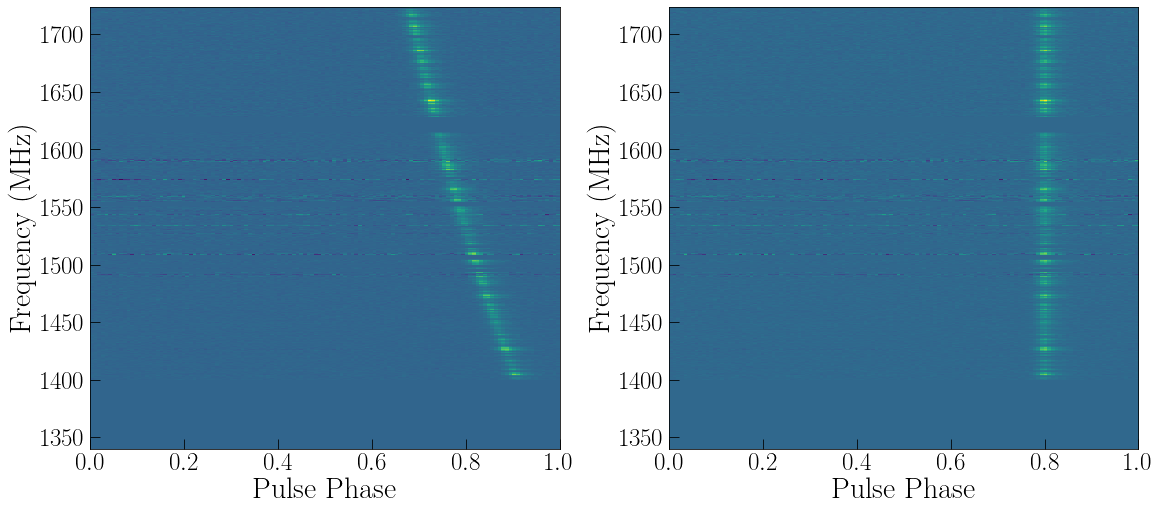

In [203]:
fig = plt.figure(figsize = [16, 7], constrained_layout=True)
ax = fig.add_subplot(122)

data_freqphase, freqMin, freqMax = get_FreqPhase(file, dedisperse=True)

ax.imshow(data_freqphase,aspect = 'auto',interpolation = 'nearest',extent = [0,1,freqMax,freqMin])

ax.set_xlabel('Pulse Phase')
ax.set_ylabel('Frequency (MHz)')

data_freqphase, freqMin, freqMax = get_FreqPhase(file, dedisperse=False)

ax = fig.add_subplot(121)

ax.imshow(data_freqphase,aspect = 'auto',interpolation = 'nearest',extent = [0,1,freqMax,freqMin])

ax.set_xlabel('Pulse Phase')
ax.set_ylabel('Frequency (MHz)')

plt.show()
plt.close()